## Project Description
Following after the Stock Crawling, this part is about Data Analysis, Data Cleaning for the objective stock indicators from China and Vietnam, the data is collected from the range 2020 to 2024. The source for China and Vietnam stock dataset is S&P Global.

Please run combine_data.ipynb before run this task.

### Importing Data and Dependencies


In [1]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from linearmodels.panel import PanelOLS, RandomEffects
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline


The raw dataset is provided in folder, and load into DataFrame

In [66]:
df = pd.read_csv("SHA.csv")
df

,Unnamed: 0,Revenue,Net Income,EPS (Diluted),Dividend Per Share,Total Assets,Total Liabilities,Shareholders' Equity,Book Value Per Share,Market Capitalization,...,PS Ratio,PB Ratio,Return on Assets (ROA),Return on Equity (ROE),Earnings Yield,Dividend Yield,Stock Symbol,Date,Stock Price,Symbol
0,Q3 2024,169972,98558,0.25,0.143,48357755,44435477,3922278,10.04,2029795,...,3.12,0.52,0.70%,8.60%,17.95%,7.44%,601398,2024-09-30 00:00:00,6.0500,601398
1,Q2 2024,150100,82814,0.23,-,47116536,43252035,3864501,9.79,1911593,...,2.94,0.49,0.76%,9.21%,18.87%,-,601398,2024-06-30 00:00:00,5.3000,601398
2,Q1 2024,150090,87653,0.24,-,47600027,43723412,3876615,9.83,1739065,...,2.66,0.45,0.85%,10.22%,20.79%,-,601398,2024-03-31 00:00:00,4.9100,601398
3,Q4 2023,181234,95320,0.26,0.306,44697079,40920491,3776588,9.55,1589701,...,2.42,0.42,0.86%,10.47%,22.90%,6.89%,601398,2023-12-31 00:00:00,4.4500,601398
4,Q3 2023,169106,94929,0.24,-,44482823,40806945,3675878,9.26,1566676,...,2.39,0.43,0.78%,9.33%,23.19%,-,601398,2023-09-30 00:00:00,4.3500,601398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38155,Q4 2020,51.54,-1.6,-0.01,0.046,578.71,107.86,470.85,2.14,1714,...,8.02,3.64,1.44%,3.65%,0.19%,0.59%,603963,2020-12-31 00:00:00,7.7550,603963
38156,Q3 2020,58.18,4.29,0.02,-,582.94,110.48,472.46,2.15,1806,...,7.96,3.82,0.06%,1.43%,0.20%,-,603963,2020-09-30 00:00:00,8.1726,603963
38157,Q2 2020,59.31,1.68,0.01,-,563.42,95.25,468.17,2.13,1854,...,7.81,3.96,-0.77%,-0.97%,0.10%,-,603963,2020-06-30 00:00:00,8.3913,603963
38158,Q1 2020,44.55,-1.13,-0.01,-,558.92,92.42,466.49,2.12,1754,...,6.84,3.76,-1.66%,-1.04%,0.28%,-,603963,2020-03-31 00:00:00,7.9385,603963


## Pre-processing Data

There are variety of indicators in the dataset, however, I only selected dedicated indicators which support my research purpose.

In [67]:
columns = ['Revenue', 'Net Income', 'EPS (Diluted)', 'Dividend Per Share', 'Total Assets', 'Total Liabilities', "Shareholders' Equity", 'Book Value Per Share',
    'Market Capitalization',
    'PE Ratio', 'PS Ratio', 'PB Ratio', 'Return on Assets (ROA)', 'Return on Equity (ROE)',
    'Earnings Yield', 'Dividend Yield', 'Stock Price', 'Date', 'Symbol'
]

Rename Columns

In [68]:
df=df[columns]
df = df.rename(columns={'EPS (Diluted)':'EPS',
                'Book Value Per Share':'BVPS',
                'Dividend Per Share':'DIV',
                'Return on Assets (ROA)':'ROA',
                'Return on Equity (ROE)':'ROE',
                'Earnings Yield':'EY',
                'Dividend Yield':'DY'})

df

,Revenue,Net Income,EPS,DIV,Total Assets,Total Liabilities,Shareholders' Equity,BVPS,Market Capitalization,PE Ratio,PS Ratio,PB Ratio,ROA,ROE,EY,DY,Stock Price,Date,Symbol
0,169972,98558,0.25,0.143,48357755,44435477,3922278,10.04,2029795,5.81,3.12,0.52,0.70%,8.60%,17.95%,7.44%,6.0500,2024-09-30 00:00:00,601398
1,150100,82814,0.23,-,47116536,43252035,3864501,9.79,1911593,5.53,2.94,0.49,0.76%,9.21%,18.87%,-,5.3000,2024-06-30 00:00:00,601398
2,150090,87653,0.24,-,47600027,43723412,3876615,9.83,1739065,5.02,2.66,0.45,0.85%,10.22%,20.79%,-,4.9100,2024-03-31 00:00:00,601398
3,181234,95320,0.26,0.306,44697079,40920491,3776588,9.55,1589701,4.55,2.42,0.42,0.86%,10.47%,22.90%,6.89%,4.4500,2023-12-31 00:00:00,601398
4,169106,94929,0.24,-,44482823,40806945,3675878,9.26,1566676,4.50,2.39,0.43,0.78%,9.33%,23.19%,-,4.3500,2023-09-30 00:00:00,601398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38155,51.54,-1.6,-0.01,0.046,578.71,107.86,470.85,2.14,1714,-,8.02,3.64,1.44%,3.65%,0.19%,0.59%,7.7550,2020-12-31 00:00:00,603963
38156,58.18,4.29,0.02,-,582.94,110.48,472.46,2.15,1806,498.75,7.96,3.82,0.06%,1.43%,0.20%,-,8.1726,2020-09-30 00:00:00,603963
38157,59.31,1.68,0.01,-,563.42,95.25,468.17,2.13,1854,1020.30,7.81,3.96,-0.77%,-0.97%,0.10%,-,8.3913,2020-06-30 00:00:00,603963
38158,44.55,-1.13,-0.01,-,558.92,92.42,466.49,2.12,1754,-,6.84,3.76,-1.66%,-1.04%,0.28%,-,7.9385,2020-03-31 00:00:00,603963


Change datetime column type

In [69]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Revenue                          object
Net Income                       object
EPS                              object
DIV                              object
Total Assets                     object
Total Liabilities                object
Shareholders' Equity             object
BVPS                             object
Market Capitalization            object
PE Ratio                         object
PS Ratio                         object
PB Ratio                         object
ROA                              object
ROE                              object
EY                               object
DY                               object
Stock Price                     float64
Date                     datetime64[ns]
Symbol                            int64
dtype: object

Since the null value in the dataset is represented as '-', so we change it into np.nan

In [70]:
df.replace("-",np.nan,inplace= True)
df

,Revenue,Net Income,EPS,DIV,Total Assets,Total Liabilities,Shareholders' Equity,BVPS,Market Capitalization,PE Ratio,PS Ratio,PB Ratio,ROA,ROE,EY,DY,Stock Price,Date,Symbol
0,169972,98558,0.25,0.143,48357755,44435477,3922278,10.04,2029795,5.81,3.12,0.52,0.70%,8.60%,17.95%,7.44%,6.0500,2024-09-30,601398
1,150100,82814,0.23,NaN,47116536,43252035,3864501,9.79,1911593,5.53,2.94,0.49,0.76%,9.21%,18.87%,NaN,5.3000,2024-06-30,601398
2,150090,87653,0.24,NaN,47600027,43723412,3876615,9.83,1739065,5.02,2.66,0.45,0.85%,10.22%,20.79%,NaN,4.9100,2024-03-31,601398
3,181234,95320,0.26,0.306,44697079,40920491,3776588,9.55,1589701,4.55,2.42,0.42,0.86%,10.47%,22.90%,6.89%,4.4500,2023-12-31,601398
4,169106,94929,0.24,NaN,44482823,40806945,3675878,9.26,1566676,4.50,2.39,0.43,0.78%,9.33%,23.19%,NaN,4.3500,2023-09-30,601398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38155,51.54,-1.6,-0.01,0.046,578.71,107.86,470.85,2.14,1714,NaN,8.02,3.64,1.44%,3.65%,0.19%,0.59%,7.7550,2020-12-31,603963
38156,58.18,4.29,0.02,NaN,582.94,110.48,472.46,2.15,1806,498.75,7.96,3.82,0.06%,1.43%,0.20%,NaN,8.1726,2020-09-30,603963
38157,59.31,1.68,0.01,NaN,563.42,95.25,468.17,2.13,1854,1020.30,7.81,3.96,-0.77%,-0.97%,0.10%,NaN,8.3913,2020-06-30,603963
38158,44.55,-1.13,-0.01,NaN,558.92,92.42,466.49,2.12,1754,NaN,6.84,3.76,-1.66%,-1.04%,0.28%,NaN,7.9385,2020-03-31,603963


As observed, the null DIV(Dividend Per Share) and DY(Dividend Yield) is demonstrated as no dividend at that quarter, so we can replace it into 0. Besides, the rows in 2019 is empty for all companies, so I decided to remove it.

In [71]:
df['DIV'].fillna(0,inplace=True)
df["DY"].fillna(0,inplace=True)
df = df[df['Date'].dt.year != 2019]
df

C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\22316473.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DIV'].fillna(0,inplace=True)
C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\22316473.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

,Revenue,Net Income,EPS,DIV,Total Assets,Total Liabilities,Shareholders' Equity,BVPS,Market Capitalization,PE Ratio,PS Ratio,PB Ratio,ROA,ROE,EY,DY,Stock Price,Date,Symbol
0,169972,98558,0.25,0.143,48357755,44435477,3922278,10.04,2029795,5.81,3.12,0.52,0.70%,8.60%,17.95%,7.44%,6.0500,2024-09-30,601398
1,150100,82814,0.23,0,47116536,43252035,3864501,9.79,1911593,5.53,2.94,0.49,0.76%,9.21%,18.87%,0,5.3000,2024-06-30,601398
2,150090,87653,0.24,0,47600027,43723412,3876615,9.83,1739065,5.02,2.66,0.45,0.85%,10.22%,20.79%,0,4.9100,2024-03-31,601398
3,181234,95320,0.26,0.306,44697079,40920491,3776588,9.55,1589701,4.55,2.42,0.42,0.86%,10.47%,22.90%,6.89%,4.4500,2023-12-31,601398
4,169106,94929,0.24,0,44482823,40806945,3675878,9.26,1566676,4.50,2.39,0.43,0.78%,9.33%,23.19%,0,4.3500,2023-09-30,601398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38154,49,0.19,0.00,0,587.53,116.47,471.06,2.14,1641,360.63,7.53,3.48,-1.32%,-1.36%,0.28%,0,7.4269,2021-03-31,603963
38155,51.54,-1.6,-0.01,0.046,578.71,107.86,470.85,2.14,1714,NaN,8.02,3.64,1.44%,3.65%,0.19%,0.59%,7.7550,2020-12-31,603963
38156,58.18,4.29,0.02,0,582.94,110.48,472.46,2.15,1806,498.75,7.96,3.82,0.06%,1.43%,0.20%,0,8.1726,2020-09-30,603963
38157,59.31,1.68,0.01,0,563.42,95.25,468.17,2.13,1854,1020.30,7.81,3.96,-0.77%,-0.97%,0.10%,0,8.3913,2020-06-30,603963


#### Observe the dataset to measure the null value of each columns.
For those companies, which indicators is significantly influence but empty, I decided to drop those companies in the list. 

In [72]:
ids_to_drop = df[df[["Total Assets", "Total Liabilities", "Shareholders' Equity",
                     "BVPS", "Market Capitalization", "Revenue", "Net Income", "EPS"]].isnull()
                 .any(axis=1)]['Symbol'].unique()
print(f"Number of company: {len(df["Symbol"].unique())}")
print(f"Number of company to drop: {len(ids_to_drop)}")
df = df[~df['Symbol'].isin(ids_to_drop)]
print(f"Remaining company: {len(df["Symbol"].unique())}")

Number of company: 1908
Number of company to drop: 823
Remaining company: 1085


Re-check null value

In [73]:
missing_data = df.isnull()
for column in missing_data.columns.tolist():
    print(column)
    print(f"Missing value: {missing_data[column].value_counts()}")

Revenue
Missing value: Revenue
False    20615
Name: count, dtype: int64
Net Income
Missing value: Net Income
False    20615
Name: count, dtype: int64
EPS
Missing value: EPS
False    20615
Name: count, dtype: int64
DIV
Missing value: DIV
False    20615
Name: count, dtype: int64
Total Assets
Missing value: Total Assets
False    20615
Name: count, dtype: int64
Total Liabilities
Missing value: Total Liabilities
False    20615
Name: count, dtype: int64
Shareholders' Equity
Missing value: Shareholders' Equity
False    20615
Name: count, dtype: int64
BVPS
Missing value: BVPS
False    20615
Name: count, dtype: int64
Market Capitalization
Missing value: Market Capitalization
False    20615
Name: count, dtype: int64
PE Ratio
Missing value: PE Ratio
False    17457
True      3158
Name: count, dtype: int64
PS Ratio
Missing value: PS Ratio
False    20615
Name: count, dtype: int64
PB Ratio
Missing value: PB Ratio
False    20615
Name: count, dtype: int64
ROA
Missing value: ROA
False    20580
True     

#### Drop missing value apply for other columns

In [74]:
df.dropna(axis = 0, inplace = True)
df

C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\711438247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis = 0, inplace = True)


,Revenue,Net Income,EPS,DIV,Total Assets,Total Liabilities,Shareholders' Equity,BVPS,Market Capitalization,PE Ratio,PS Ratio,PB Ratio,ROA,ROE,EY,DY,Stock Price,Date,Symbol
0,169972,98558,0.25,0.143,48357755,44435477,3922278,10.04,2029795,5.81,3.12,0.52,0.70%,8.60%,17.95%,7.44%,6.0500,2024-09-30,601398
1,150100,82814,0.23,0,47116536,43252035,3864501,9.79,1911593,5.53,2.94,0.49,0.76%,9.21%,18.87%,0,5.3000,2024-06-30,601398
2,150090,87653,0.24,0,47600027,43723412,3876615,9.83,1739065,5.02,2.66,0.45,0.85%,10.22%,20.79%,0,4.9100,2024-03-31,601398
3,181234,95320,0.26,0.306,44697079,40920491,3776588,9.55,1589701,4.55,2.42,0.42,0.86%,10.47%,22.90%,6.89%,4.4500,2023-12-31,601398
4,169106,94929,0.24,0,44482823,40806945,3675878,9.26,1566676,4.50,2.39,0.43,0.78%,9.33%,23.19%,0,4.3500,2023-09-30,601398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38132,209.33,2.43,0.00,0,3492,1146,2346,4.64,3846,-4.88,1.82,1.64,-2.04%,-16.47%,-20.50%,0,7.5900,2021-09-30,600070
38134,541.47,88.65,0.17,0,3782,1326,2455,4.85,3192,-7.85,1.09,1.30,-6.33%,-112.59%,-12.74%,0,6.2652,2021-03-31,600070
38136,710.08,78.27,0.15,0,4283,1136,3147,6.20,6096,12.84,1.99,1.94,2.81%,25.51%,7.79%,0,11.9635,2020-09-30,600070
38137,653.02,207.65,0.41,0,5134,1669,3465,6.14,6430,13.44,2.17,1.86,2.63%,8.42%,7.44%,0,12.5495,2020-06-30,600070


#### Correcting data types

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17391 entries, 0 to 38138
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Revenue                17391 non-null  object        
 1   Net Income             17391 non-null  object        
 2   EPS                    17391 non-null  object        
 3   DIV                    17391 non-null  object        
 4   Total Assets           17391 non-null  object        
 5   Total Liabilities      17391 non-null  object        
 6   Shareholders' Equity   17391 non-null  object        
 7   BVPS                   17391 non-null  object        
 8   Market Capitalization  17391 non-null  object        
 9   PE Ratio               17391 non-null  object        
 10  PS Ratio               17391 non-null  object        
 11  PB Ratio               17391 non-null  object        
 12  ROA                    17391 non-null  object        
 13  ROE   

#### Insert Date Column



In [76]:
# List of columns to process
numeric_columns = [
    'Revenue', 'Net Income', 'EPS', 'DIV',
    'Total Assets', 'Total Liabilities', "Shareholders' Equity",
    'BVPS', 'Market Capitalization', 'PE Ratio',
    'PS Ratio', 'PB Ratio'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df.dtypes

C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\2324550814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


Revenue                         float64
Net Income                      float64
EPS                             float64
DIV                             float64
Total Assets                    float64
Total Liabilities               float64
Shareholders' Equity            float64
BVPS                            float64
Market Capitalization             int64
PE Ratio                        float64
PS Ratio                        float64
PB Ratio                        float64
ROA                              object
ROE                              object
EY                               object
DY                               object
Stock Price                     float64
Date                     datetime64[ns]
Symbol                            int64
dtype: object

In [77]:
# Replace 'Upgrade' in 'Return on Assets (ROA)' with Net Income / Total Assets
df.loc[df['ROA'] == 'Upgrade', 'ROA'] = (
    df['Net Income'] / df['Total Assets']
)
# Replace 'Upgrade' in 'Return on Equity (ROE)' with Net Income / Shareholders' Equity
df.loc[df['ROE'] == 'Upgrade', 'ROE'] = (
    df['Net Income'] / df["Shareholders' Equity"]
)

Convert percentage column(string) into number

In [78]:
percentage_columns = ["ROA", "ROE", "EY", "DY"]
# Apply the operation to each column
for col in percentage_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.rstrip('%'), errors='coerce') / 100
df[percentage_columns] = df[percentage_columns].apply(pd.to_numeric, errors='coerce')
df.dtypes

C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\1011846705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col].astype(str).str.rstrip('%'), errors='coerce') / 100
C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\1011846705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col].astype(str).str.rstrip('%'), errors='coerce') / 100
C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\1011846705.py:4: SettingWithCopyWarning: 
A value is trying to be se

Revenue                         float64
Net Income                      float64
EPS                             float64
DIV                             float64
Total Assets                    float64
Total Liabilities               float64
Shareholders' Equity            float64
BVPS                            float64
Market Capitalization             int64
PE Ratio                        float64
PS Ratio                        float64
PB Ratio                        float64
ROA                             float64
ROE                             float64
EY                              float64
DY                              float64
Stock Price                     float64
Date                     datetime64[ns]
Symbol                            int64
dtype: object

Adding some influence indicators

In [79]:
df["SIZE"] = np.log(df["Total Assets"])
df["DAR"] = df["Total Liabilities"]/df["Total Assets"]
df

C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\3741647307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SIZE"] = np.log(df["Total Assets"])
C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\3741647307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DAR"] = df["Total Liabilities"]/df["Total Assets"]


,Revenue,Net Income,EPS,DIV,Total Assets,Total Liabilities,Shareholders' Equity,BVPS,Market Capitalization,PE Ratio,...,PB Ratio,ROA,ROE,EY,DY,Stock Price,Date,Symbol,SIZE,DAR
0,169972.00,98558.00,0.25,0.143,48357755.0,44435477.0,3922278.0,10.04,2029795,5.81,...,0.52,0.0070,0.0860,0.1795,0.0744,6.0500,2024-09-30,601398,17.694137,0.918890
1,150100.00,82814.00,0.23,0.000,47116536.0,43252035.0,3864501.0,9.79,1911593,5.53,...,0.49,0.0076,0.0921,0.1887,0.0000,5.3000,2024-06-30,601398,17.668135,0.917980
2,150090.00,87653.00,0.24,0.000,47600027.0,43723412.0,3876615.0,9.83,1739065,5.02,...,0.45,0.0085,0.1022,0.2079,0.0000,4.9100,2024-03-31,601398,17.678344,0.918559
3,181234.00,95320.00,0.26,0.306,44697079.0,40920491.0,3776588.0,9.55,1589701,4.55,...,0.42,0.0086,0.1047,0.2290,0.0689,4.4500,2023-12-31,601398,17.615419,0.915507
4,169106.00,94929.00,0.24,0.000,44482823.0,40806945.0,3675878.0,9.26,1566676,4.50,...,0.43,0.0078,0.0933,0.2319,0.0000,4.3500,2023-09-30,601398,17.610614,0.917364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38132,209.33,2.43,0.00,0.000,3492.0,1146.0,2346.0,4.64,3846,-4.88,...,1.64,-0.0204,-0.1647,-0.2050,0.0000,7.5900,2021-09-30,600070,8.158230,0.328179
38134,541.47,88.65,0.17,0.000,3782.0,1326.0,2455.0,4.85,3192,-7.85,...,1.30,-0.0633,-1.1259,-0.1274,0.0000,6.2652,2021-03-31,600070,8.238008,0.350608
38136,710.08,78.27,0.15,0.000,4283.0,1136.0,3147.0,6.20,6096,12.84,...,1.94,0.0281,0.2551,0.0779,0.0000,11.9635,2020-09-30,600070,8.362409,0.265235
38137,653.02,207.65,0.41,0.000,5134.0,1669.0,3465.0,6.14,6430,13.44,...,1.86,0.0263,0.0842,0.0744,0.0000,12.5495,2020-06-30,600070,8.543640,0.325088


## Data Analysis

### Descriptive statistics

In [80]:
df.describe()

,Revenue,Net Income,EPS,DIV,Total Assets,Total Liabilities,Shareholders' Equity,BVPS,Market Capitalization,PE Ratio,...,PB Ratio,ROA,ROE,EY,DY,Stock Price,Date,Symbol,SIZE,DAR
count,17391.000000,17391.000000,17391.000000,17391.000000,1.739100e+04,1.739100e+04,1.739100e+04,17391.000000,1.739100e+04,17391.000000,...,17391.000000,17391.000000,17391.000000,17391.000000,17391.000000,17391.000000,17391,17391.000000,17391.000000,17391.000000
mean,9136.376628,959.945772,0.232574,0.067497,3.037500e+05,2.644823e+05,3.926769e+04,7.425926,3.772889e+04,39.448026,...,2.765866,0.037008,0.096936,0.050731,0.004952,22.469509,2022-06-12 07:45:20.648611584,608894.544420,9.399637,0.444660
min,-4857.000000,-48.730000,-0.020000,0.000000,1.466500e+02,7.220000e+00,1.017400e+02,0.520000,8.040000e+02,-15656.300000,...,0.120000,-0.597200,-2.229300,-2.184500,0.000000,0.352100,2020-03-31 00:00:00,600000.000000,4.988049,0.012849
25%,410.840000,31.800000,0.060000,0.000000,3.251000e+03,9.851950e+02,1.976000e+03,3.970000,4.369500e+03,13.255000,...,1.130000,0.010700,0.039700,0.020100,0.000000,6.220000,2021-03-31 00:00:00,600605.000000,8.086718,0.280361
50%,1105.000000,96.740000,0.130000,0.000000,8.183000e+03,3.365000e+03,4.440000e+03,5.900000,9.711000e+03,23.810000,...,1.890000,0.029200,0.085700,0.038200,0.000000,11.200000,2022-06-30 00:00:00,601677.000000,9.009814,0.436739
75%,3894.500000,314.835000,0.260000,0.000000,3.086600e+04,1.582950e+04,1.453400e+04,8.730000,2.559900e+04,43.575000,...,3.250000,0.055000,0.142700,0.067350,0.000000,20.720000,2023-06-30 00:00:00,603533.000000,10.337410,0.584765
max,876259.000000,98558.000000,19.160000,30.876000,4.835776e+07,4.443548e+07,3.922278e+06,190.840000,2.583622e+06,33283.480000,...,48.020000,1.749400,3.948300,0.709100,0.418500,1896.510000,2024-09-30 00:00:00,900948.000000,17.694137,0.941482
std,43321.628718,5398.471717,0.568805,0.476582,2.439189e+06,2.238894e+06,2.099759e+05,7.301567,1.329616e+05,434.269968,...,2.963415,0.053543,0.140646,0.058845,0.016189,63.456805,NaN,26806.294834,1.845826,0.208577


### Correlation

In [81]:
df.corr()

,Revenue,Net Income,EPS,DIV,Total Assets,Total Liabilities,Shareholders' Equity,BVPS,Market Capitalization,PE Ratio,...,PB Ratio,ROA,ROE,EY,DY,Stock Price,Date,Symbol,SIZE,DAR
Revenue,1.000000,0.451733,0.043102,0.020711,0.283596,0.261367,0.507542,0.080350,0.449706,-0.011356,...,-0.113674,-0.019499,0.017153,0.276443,0.134401,-0.015858,0.028737,-0.052168,0.427657,0.190916
Net Income,0.451733,1.000000,0.126172,0.051454,0.939821,0.932885,0.970448,0.149249,0.802420,-0.011547,...,-0.084854,-0.014186,0.039710,0.345683,0.118675,0.055456,0.017900,-0.039746,0.495070,0.242276
EPS,0.043102,0.126172,1.000000,0.401630,0.018181,0.015631,0.044537,0.796153,0.450620,-0.008324,...,0.182621,0.349780,0.264779,0.124920,0.042174,0.787608,0.016401,0.090113,0.104771,-0.046569
DIV,0.020711,0.051454,0.401630,1.000000,0.005568,0.004226,0.019621,0.362013,0.226620,-0.003883,...,0.074190,0.151162,0.109683,0.046409,0.286410,0.389681,0.018100,0.019684,0.040619,-0.030397
Total Assets,0.283596,0.939821,0.018181,0.005568,1.000000,0.999636,0.957773,0.062872,0.685267,-0.009121,...,-0.091224,-0.058640,0.003172,0.314621,0.097462,-0.027322,0.020255,-0.033890,0.444898,0.254392
Total Liabilities,0.261367,0.932885,0.015631,0.004226,0.999636,1.000000,0.949671,0.059073,0.674898,-0.008877,...,-0.088699,-0.059028,0.002680,0.310130,0.094391,-0.028846,0.019287,-0.032701,0.435557,0.252523
Shareholders' Equity,0.507542,0.970448,0.044537,0.019621,0.957773,0.949671,1.000000,0.100480,0.764230,-0.011303,...,-0.113933,-0.051802,0.008267,0.348003,0.125718,-0.009807,0.029636,-0.045009,0.523987,0.262588
BVPS,0.080350,0.149249,0.796153,0.362013,0.062872,0.059073,0.100480,1.000000,0.464152,-0.017490,...,0.074226,0.186157,0.146856,0.148358,0.046004,0.773321,0.119067,0.144271,0.222848,-0.027947
Market Capitalization,0.449706,0.802420,0.450620,0.226620,0.685267,0.674898,0.764230,0.464152,1.000000,-0.006777,...,0.076706,0.079835,0.092573,0.219113,0.087490,0.502110,0.015648,-0.035666,0.491512,0.166117
PE Ratio,-0.011356,-0.011547,-0.008324,-0.003883,-0.009121,-0.008877,-0.011303,-0.017490,-0.006777,1.000000,...,0.042357,-0.016967,-0.017154,-0.038019,-0.014445,0.009452,-0.001546,0.008050,-0.021655,-0.001832


### Data Preparation

In [82]:
X = df.drop(columns=["Quarter","Date","Stock Symbol","Symbol","Stock Price"])
Y = df["Stock Price"]

KeyError: "['Quarter', 'Stock Symbol'] not found in axis"

In [83]:
panel_df = df
panel_df = panel_df.set_index(['Symbol','Date'])
Y_panel = panel_df["Stock Price"]
X_panel = panel_df.drop(columns=["Stock Price"])
X_panel = sm.add_constant(X_panel)
X_panel

const    Revenue  Net Income   EPS    DIV  Total Assets  \
Symbol Date                                                                  
601398 2024-09-30    1.0  169972.00    98558.00  0.25  0.143    48357755.0   
       2024-06-30    1.0  150100.00    82814.00  0.23  0.000    47116536.0   
       2024-03-31    1.0  150090.00    87653.00  0.24  0.000    47600027.0   
       2023-12-31    1.0  181234.00    95320.00  0.26  0.306    44697079.0   
       2023-09-30    1.0  169106.00    94929.00  0.24  0.000    44482823.0   
...                  ...        ...         ...   ...    ...           ...   
600070 2021-09-30    1.0     209.33        2.43  0.00  0.000        3492.0   
       2021-03-31    1.0     541.47       88.65  0.17  0.000        3782.0   
       2020-09-30    1.0     710.08       78.27  0.15  0.000        4283.0   
       2020-06-30    1.0     653.02      207.65  0.41  0.000        5134.0   
       2020-03-31    1.0     644.94       62.03  0.12  0.000        4821.0   

                   Total Liabilities  Shareholders' Equity   BVPS  \
Symbol Date                                                         
601398 2024-09-30         44435477.0             3922278.0  10.04   
       2024-06-30         43252035.0             3864501.0   9.79   
       2024-03-31         43723412.0             3876615.0   9.83   
       2023-12-31         40920491.0             3776588.0   9.55   
       2023-09-30         40806945.0             3675878.0   9.26   
...                              ...                   ...    ...   
600070 2021-09-30             1146.0                2346.0   4.64   
       2021-03-31             1326.0                2455.0   4.85   
       2020-09-30             1136.0                3147.0   6.20   
       2020-06-30             1669.0                3465.0   6.14   
       2020-03-31             1566.0                3256.0   5.73   

                   Market Capitalization  PE Ratio  PS Ratio  PB Ratio  \
Symbol Date                                                              
601398 2024-09-30                2029795      5.81      3.12      0.52   
       2024-06-30                1911593      5.53      2.94      0.49   
       2024-03-31                1739065      5.02      2.66      0.45   
       2023-12-31                1589701      4.55      2.42      0.42   
       2023-09-30                1566676      4.50      2.39      0.43   
...                                  ...       ...       ...       ...   
600070 2021-09-30                   3846     -4.88      1.82      1.64   
       2021-03-31                   3192     -7.85      1.09      1.30   
       2020-09-30                   6096     12.84      1.99      1.94   
       2020-06-30                   6430     13.44      2.17      1.86   
       2020-03-31                   4852     12.95      1.59      1.49   

                      ROA     ROE      EY      DY       SIZE       DAR  
Symbol Date                                                             
601398 2024-09-30  0.0070  0.0860  0.1795  0.0744  17.694137  0.918890  
       2024-06-30  0.0076  0.0921  0.1887  0.0000  17.668135  0.917980  
       2024-03-31  0.0085  0.1022  0.2079  0.0000  17.678344  0.918559  
       2023-12-31  0.0086  0.1047  0.2290  0.0689  17.615419  0.915507  
       2023-09-30  0.0078  0.0933  0.2319  0.0000  17.610614  0.917364  
...                   ...     ...     ...     ...        ...       ...  
600070 2021-09-30 -0.0204 -0.1647 -0.2050  0.0000   8.158230  0.328179  
       2021-03-31 -0.0633 -1.1259 -0.1274  0.0000   8.238008  0.350608  
       2020-09-30  0.0281  0.2551  0.0779  0.0000   8.362409  0.265235  
       2020-06-30  0.0263  0.0842  0.0744  0.0000   8.543640  0.325088  
       2020-03-31 -0.0324  0.1651  0.0772  0.0000   8.480737  0.324829  

[17391 rows x 19 columns]

In [84]:
X_panel.dtypes

const                    float64
Revenue                  float64
Net Income               float64
EPS                      float64
DIV                      float64
Total Assets             float64
Total Liabilities        float64
Shareholders' Equity     float64
BVPS                     float64
Market Capitalization      int64
PE Ratio                 float64
PS Ratio                 float64
PB Ratio                 float64
ROA                      float64
ROE                      float64
EY                       float64
DY                       float64
SIZE                     float64
DAR                      float64
dtype: object

## Model Application

#### OLS model

In [86]:
# Ensure there is an entity and time index for panel models
X = sm.add_constant(X)
ols_model = sm.OLS(Y,X).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Stock Price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     6005.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:32:46   Log-Likelihood:                -86167.
No. Observations:               17391   AIC:                         1.724e+05
Df Residuals:                   17383   BIC:                         1.724e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9596      1.450     21.355      0.000      28.118      33.801
EPS           46.5794      0.826     56.406      0.000      44.961      48.198
BVPS           3.8933      0.063     61.935      0.000       3.770       4.017
ROA           35.4572      8.509      4.167      0.000      18.778      52.136
ROE          -15.3865      3.075     -5.003      0.000     -21.414      -9.359
DIV            8.5338      0.599     14.258      0.000       7.361       9.707
DAR           -6.7824      1.747     -3.883      0.000     -10.206      -3.359
SIZE          -4.8529      0.201    -24.202      0.000      -5.246      -4.460
==============================================================================
Omnibus:                    19275.755   Durbin-Watson:                   0.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18783628.956
Skew:                           4.817   Prob(JB):                         0.00
Kurtosis:                     163.714   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GLS Model

In [52]:
gls_model = sm.GLS(Y,X).fit()
gls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:            Stock Price   R-squared:                       0.707
Model:                            GLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     6005.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:25:28   Log-Likelihood:                -86167.
No. Observations:               17391   AIC:                         1.724e+05
Df Residuals:                   17383   BIC:                         1.724e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9596      1.450     21.355      0.000      28.118      33.801
EPS           46.5794      0.826     56.406      0.000      44.961      48.198
BVPS           3.8933      0.063     61.935      0.000       3.770       4.017
ROA           35.4572      8.509      4.167      0.000      18.778      52.136
ROE          -15.3865      3.075     -5.003      0.000     -21.414      -9.359
DIV            8.5338      0.599     14.258      0.000       7.361       9.707
DAR           -6.7824      1.747     -3.883      0.000     -10.206      -3.359
SIZE          -4.8529      0.201    -24.202      0.000      -5.246      -4.460
==============================================================================
Omnibus:                    19275.755   Durbin-Watson:                   0.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18783628.956
Skew:                           4.817   Prob(JB):                         0.00
Kurtosis:                     163.714   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
fem_model = PanelOLS(Y_panel, X_panel, entity_effects=True)  # entity_effects=True để thêm hiệu ứng cá thể
fem_results = fem_model.fit()
fem_results

Dep. Variable:,Stock Price,R-squared:,0.5254
Estimator:,PanelOLS,R-squared (Between):,0.4541
No. Observations:,17391,R-squared (Within):,0.5254
Date:,"Mon, Mar 17 2025",R-squared (Overall):,0.4685
Time:,19:32:48,Log-likelihood,-6.436e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1001.7
Entities:,1085,P-value,0.0000
Avg Obs:,16.029,Distribution:,"F(18,16288)"
Min Obs:,1.0000,,
Max Obs:,19.000,F-statistic (robust):,1001.7


In [58]:
X_panel.dtypes

const                    float64
Revenue                  float64
Net Income               float64
EPS                      float64
DIV                      float64
Total Assets             float64
Total Liabilities        float64
Shareholders' Equity     float64
BVPS                     float64
Market Capitalization      int64
PE Ratio                 float64
PS Ratio                 float64
PB Ratio                 float64
ROA                      float64
ROE                      float64
EY                       float64
DY                       float64
SIZE                     float64
DAR                      float64
dtype: object

In [88]:
rem_model = RandomEffects(Y_panel, X_panel)  # entity_effects=True để thêm hiệu ứng cá thể
rem_results = rem_model.fit()
rem_results

Dep. Variable:,Stock Price,R-squared:,0.5846
Estimator:,RandomEffects,R-squared (Between):,0.8061
No. Observations:,17391,R-squared (Within):,0.4876
Date:,"Mon, Mar 17 2025",R-squared (Overall):,0.7901
Time:,19:32:52,Log-likelihood,-6.637e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1358.4
Entities:,1085,P-value,0.0000
Avg Obs:,16.029,Distribution:,"F(18,17372)"
Min Obs:,1.0000,,
Max Obs:,19.000,F-statistic (robust):,1361.5


In [89]:
panel_pred = fem_results.predict().values
ols_pred = ols_model.predict()
re_pred = rem_results.predict().values


### Data Visualization

In [92]:
def compute_metrics(y, y_pred):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y,y_pred)
    return r2, mse, rmse

panel_r2, panel_mse, panel_rmse = compute_metrics(Y, panel_pred)
ols_r2, ols_mse, ols_rmse = compute_metrics(Y, ols_pred)
re_r2, re_mse, re_rmse = compute_metrics(Y, re_pred)

C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\1440672464.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R²", data=results_df, ax=axes[0], palette="Blues")
C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\1440672464.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=results_df, ax=axes[1], palette="Reds")
C:\Users\ntuan\AppData\Local\Temp\ipykernel_10292\1440672464.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, ax=axes[2], palette="Greens")


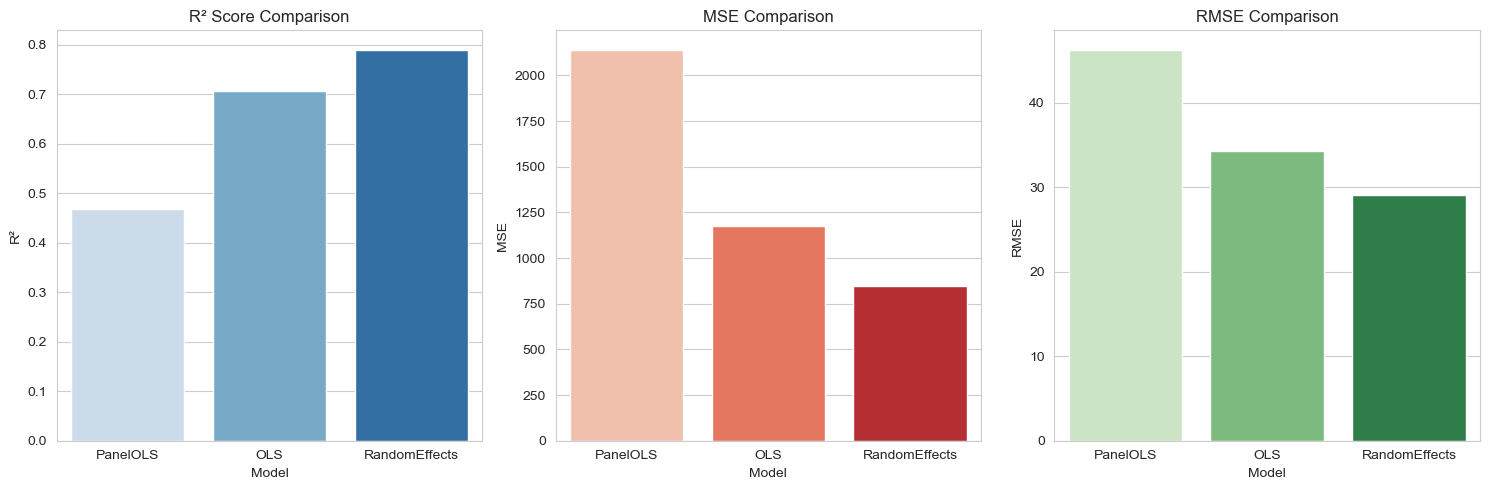

In [94]:

results_df = pd.DataFrame({
    "Model": ["PanelOLS", "OLS", "RandomEffects"],
    "R²": [panel_r2, ols_r2, re_r2],
    "MSE": [panel_mse, ols_mse, re_mse],
    "RMSE": [panel_rmse, ols_rmse, re_rmse]
})


sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# R² Plot
sns.barplot(x="Model", y="R²", data=results_df, ax=axes[0], palette="Blues")
axes[0].set_title("R² Score Comparison")

# MSE Plot
sns.barplot(x="Model", y="MSE", data=results_df, ax=axes[1], palette="Reds")
axes[1].set_title("MSE Comparison")

# RMSE Plot
sns.barplot(x="Model", y="RMSE", data=results_df, ax=axes[2], palette="Greens")
axes[2].set_title("RMSE Comparison")

plt.tight_layout()
plt.show()
